Masukkan nilai untuk setiap parameter (0-10):


Kecepatan pelayanan (0-10):  9
Kualitas makanan (0-10):  10
Suasana restoran (0-10):  10


Tingkat kebahagiaan pelanggan adalah: 8.28 dari 10


C:\Users\mutia\AppData\Local\Programs\Python\Python311\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


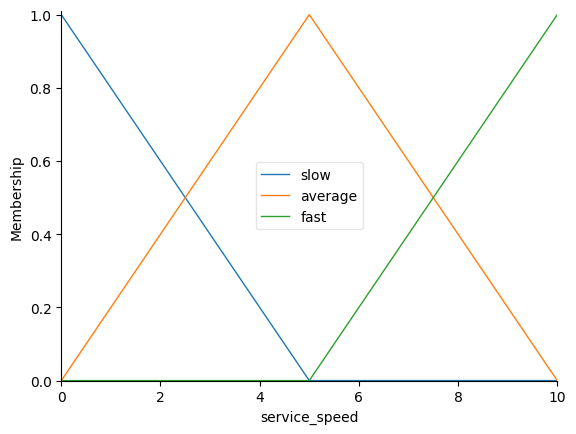

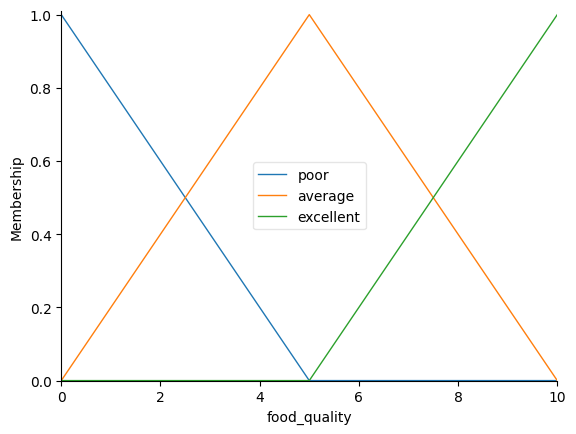

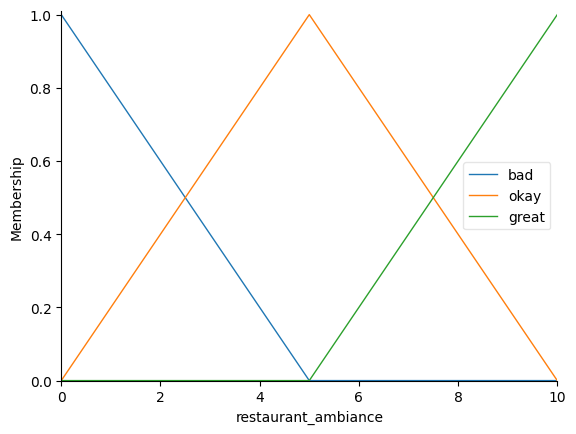

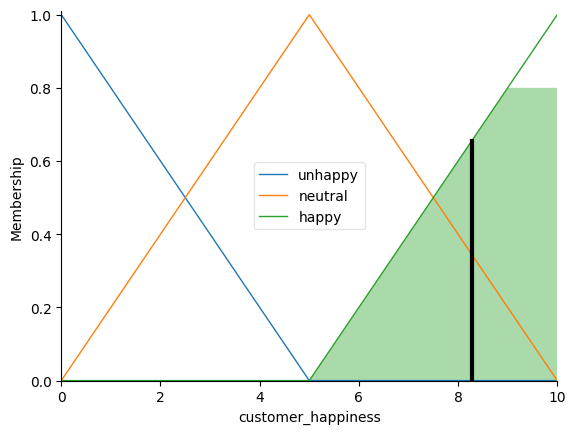

In [1]:
!pip install numpy scikit-fuzzy matplotlib
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define fuzzy variables
# Input variables
service_speed = ctrl.Antecedent(np.arange(0, 11, 1), 'service_speed')
food_quality = ctrl.Antecedent(np.arange(0, 11, 1), 'food_quality')
restaurant_ambiance = ctrl.Antecedent(np.arange(0, 11, 1), 'restaurant_ambiance')

# Output variable
customer_happiness = ctrl.Consequent(np.arange(0, 11, 1), 'customer_happiness')

# Define fuzzy membership functions for service speed
service_speed['slow'] = fuzz.trimf(service_speed.universe, [0, 0, 5])
service_speed['average'] = fuzz.trimf(service_speed.universe, [0, 5, 10])
service_speed['fast'] = fuzz.trimf(service_speed.universe, [5, 10, 10])

# Define fuzzy membership functions for food quality
food_quality['poor'] = fuzz.trimf(food_quality.universe, [0, 0, 5])
food_quality['average'] = fuzz.trimf(food_quality.universe, [0, 5, 10])
food_quality['excellent'] = fuzz.trimf(food_quality.universe, [5, 10, 10])

# Define fuzzy membership functions for restaurant ambiance
restaurant_ambiance['bad'] = fuzz.trimf(restaurant_ambiance.universe, [0, 0, 5])
restaurant_ambiance['okay'] = fuzz.trimf(restaurant_ambiance.universe, [0, 5, 10])
restaurant_ambiance['great'] = fuzz.trimf(restaurant_ambiance.universe, [5, 10, 10])

# Define fuzzy membership functions for customer happiness
customer_happiness['unhappy'] = fuzz.trimf(customer_happiness.universe, [0, 0, 5])
customer_happiness['neutral'] = fuzz.trimf(customer_happiness.universe, [0, 5, 10])
customer_happiness['happy'] = fuzz.trimf(customer_happiness.universe, [5, 10, 10])

# Define fuzzy rules
rule1 = ctrl.Rule(service_speed['slow'] | food_quality['poor'] | restaurant_ambiance['bad'], customer_happiness['unhappy'])
rule2 = ctrl.Rule(service_speed['average'] & food_quality['average'] & restaurant_ambiance['okay'], customer_happiness['neutral'])
rule3 = ctrl.Rule(service_speed['fast'] & food_quality['excellent'] & restaurant_ambiance['great'], customer_happiness['happy'])

# Build control system
happiness_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
happiness_simulation = ctrl.ControlSystemSimulation(happiness_ctrl)

# Get user input
print("Masukkan nilai untuk setiap parameter (0-10):")
service = float(input("Kecepatan pelayanan (0-10): "))
food = float(input("Kualitas makanan (0-10): "))
ambiance = float(input("Suasana restoran (0-10): "))

# Apply inputs to simulation
happiness_simulation.input['service_speed'] = service
happiness_simulation.input['food_quality'] = food
happiness_simulation.input['restaurant_ambiance'] = ambiance

# Compute result
happiness_simulation.compute()

# Display result
happiness_score = happiness_simulation.output['customer_happiness']
print(f"Tingkat kebahagiaan pelanggan adalah: {happiness_score:.2f} dari 10")

# Visualize results
service_speed.view()
food_quality.view()
restaurant_ambiance.view()
customer_happiness.view(sim=happiness_simulation)

